# Exercice 4 : Regression on a given dataset

In [5]:
import numpy as np

#Load data
X_train = np.load('../data/regression/X_train.npy')
y_train = np.load('../data/regression/y_train.npy')
X_test = np.load('../data/regression/X_test.npy')
y_test = np.load('../data/regression/y_test.npy')



We have decided to use a decision tree and a Lasso regressor, first let's see how well they perform on our data, without any hyperparameters optimization

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# create a Decision Tree Regressor model
tree_reg = DecisionTreeRegressor()

# fit the Decision Tree Regressor model to the data
tree_reg.fit(X_train, y_train)

# use the Decision Tree Regressor model to make predictions
tree_reg_predictions = tree_reg.predict(X_test)

# compute the R^2 score of the Decision Tree Regressor model
tree_reg_r2 = r2_score(y_test, tree_reg_predictions)

# create a Lasso Regressor model
lasso_reg = Lasso()

# fit the Lasso Regressor model to the data
lasso_reg.fit(X_train, y_train)

# use the Lasso Regressor model to make predictions
lasso_reg_predictions = lasso_reg.predict(X_test)

# compute the R^2 score of the Lasso Regressor model
lasso_reg_r2 = r2_score(y_test, lasso_reg_predictions)

# print the R^2 scores of the two models
print(f"Decision Tree Regression R^2 Score: {tree_reg_r2}")
print(f"Lasso Regression R^2 Score: {lasso_reg_r2}")


Decision Tree Regression R^2 Score: -0.042890171044692726
Lasso Regression R^2 Score: -0.00023463964353065414


Both scores are negative, meaning the regressor is worse than random

Now let's try to see how well they perform using Gridsearch for hyperparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# define the parameter grid for the Decision Tree Regressor
tree_param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
}

# create a base Decision Tree Regressor model
tree_reg = DecisionTreeRegressor()

# instantiate the grid search model for the Decision Tree Regressor
tree_grid_search = GridSearchCV(estimator=tree_reg, param_grid=tree_param_grid)

# fit the grid search to the data
tree_grid_search.fit(X_train, y_train)

# use the best Decision Tree Regressor model to make predictions
best_tree_reg = tree_grid_search.best_estimator_
best_tree_reg_predictions = best_tree_reg.predict(X_test)

# compute the R^2 score of the best Decision Tree Regressor model
best_tree_reg_r2 = r2_score(y_test, best_tree_reg_predictions)

print(f"Best Decision Tree Regression R^2 Score: {best_tree_reg_r2}")


Best Decision Tree Regression R^2 Score: 0.28382125417930626


In [31]:
# define the parameter grid for the Lasso Regressor
lasso_param_grid = {
    'alpha': np.linspace(10e-8, 0.5),
    'fit_intercept' : [True, False]
    }

# create a base Lasso Regressor model
lasso_reg = Lasso()

# instantiate the grid search model for the Lasso Regressor
lasso_grid_search = GridSearchCV(estimator=lasso_reg, param_grid=lasso_param_grid)

# fit the grid search to the data
lasso_grid_search.fit(X_train, y_train)

# use the best Lasso Regressor model to make predictions
best_lasso_reg = lasso_grid_search.best_estimator_
best_lasso_reg_predictions = best_lasso_reg.predict(X_test)

# compute the R^2 score of the best Lasso Regressor model
best_lasso_reg_r2 = r2_score(y_test, best_lasso_reg_predictions)

print(f"Best Lasso Regression R^2 Score: {best_lasso_reg_r2}")

Best Lasso Regression R^2 Score: 0.8991237141926348


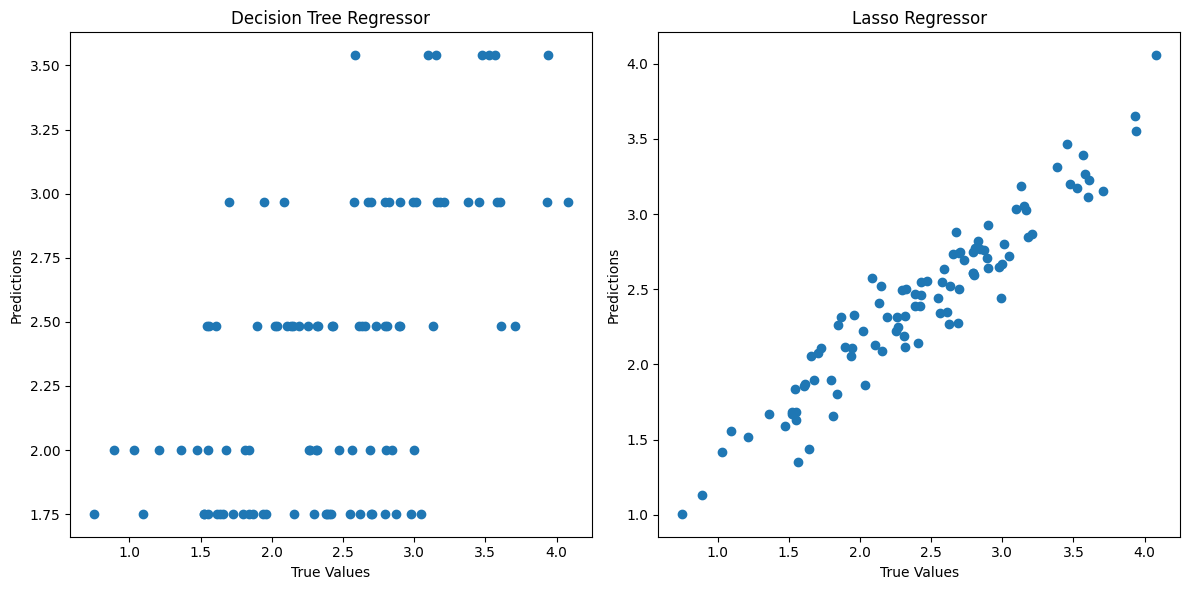

In [25]:
# plot the true values and the predictions of the two models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, best_tree_reg_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor')

plt.subplot(1, 2, 2)
plt.scatter(y_test, best_lasso_reg_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regressor')

plt.tight_layout()
plt.show()

The tree decision seems to be a bad regressor for our data, but the lasso one fit extremely well.

The R2 score given for the bayes estimator in the project description seems wrong as we achieve have a better one (over 0.88)